In [ ]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2021

In [68]:
using Clustering
using StatsPlots
using ParallelKMeans
using Distances
using Plots
using LinearAlgebra
using Statistics
using Random
gr(size=(400,300))

Plots.GRBackend()

In [69]:
# make a random dataset with 1000 random 5-dimensional points
X = rand(2, 1000)
k = 20

20

In [70]:
Random.seed!(34568)
X1 = randn(2, 200) .+ [0., 5.]
X2 = randn(2, 200) .+ [-5., 0.]
X3 = randn(2, 200) .+ [5., 0.]
X = hcat(X1, X2, X3)
k = 3

3

# Clustering Studies

In [71]:
# cluster X into 20 clusters using K-means
R = Clustering.kmeans(X, k; maxiter=200, display=:iter)

@assert nclusters(R) == k # verify the number of clusters

a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.779789e+03
      1       1.183969e+03      -1.595819e+03 |        0
      2       1.183969e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 1183.969224234018)


2×3 Array{Float64,2}:
 -0.0764759  -4.97294      4.98824
  4.80984    -0.00248025  -0.0320581

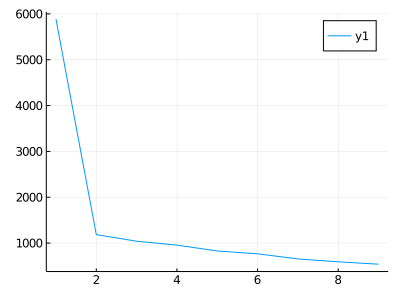

In [72]:
b = [ParallelKMeans.kmeans(X, i, n_threads=1; tol=1e-6, max_iters=300, verbose=false).totalcost for i = 2:10]
plot(b)

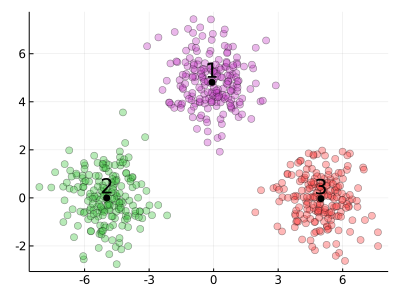

In [73]:
scatter(X[1,:],X[2,:], marker_z=a,color=:lightrainbow,alpha=0.4, legend=false)
scatter!(M[1,:],M[2,:],color=:black,series_annotations = text.(1:length(a), :bottom))

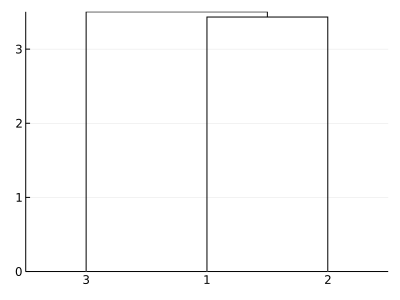

In [74]:
D=Distances.pairwise(Euclidean(), M, dims=2)
hc = hclust(D, linkage=:single)
plot(hc)

## K medoids

In [75]:
# X = rand(d, n)
dist1 = pairwise(SqEuclidean(), X, dims=2);
R1 = kmedoids(dist1, k)
a1 = assignments(R1) # get the assignments of points to clusters
c1 = counts(R1); # get the cluster sizes
# M = R.centers # get the cluster centers

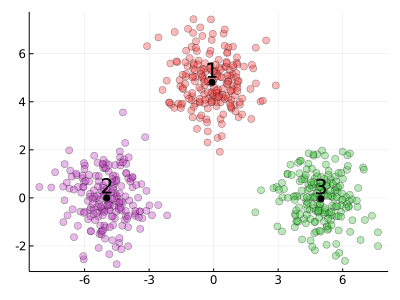

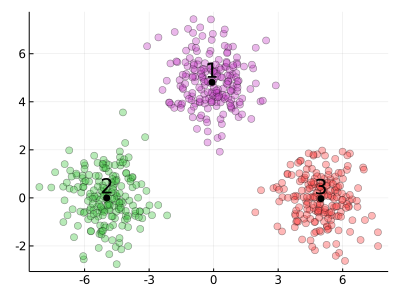

In [76]:
scatter(X[1,:],X[2,:], marker_z=a1,color=:lightrainbow,alpha=0.4, legend=false)
display(scatter!(M[1,:],M[2,:],color=:black,series_annotations = text.(1:length(a), :bottom)))

scatter(X[1,:],X[2,:], marker_z=a,color=:lightrainbow,alpha=0.4, legend=false)
display(scatter!(M[1,:],M[2,:],color=:black,series_annotations = text.(1:length(a), :bottom)))

In [77]:
sum(R.costs)
sum(R1.costs)

1185.5519094082326

# Affinity Propagation

In [78]:
S = -pairwise(Euclidean(), X, X, dims=2)
# set diagonal value to median value
S = S - diagm(0 => diag(S)) + median(S)*I


R2 = affinityprop(S; maxiter=200, tol=1e-6, damp=0.5,display=:none)
a2 = assignments(R2) # get the assignments of points to clusters
c2 = counts(R2); # get the cluster sizes

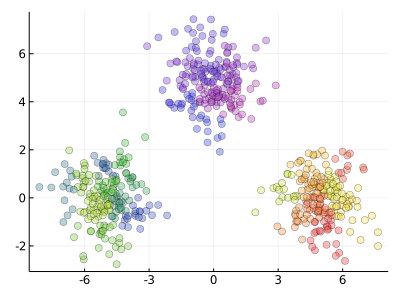

In [79]:
scatter(X[1,:],X[2,:], marker_z=a2,color=:lightrainbow,alpha=0.4, legend=false)

In [80]:
length(R2.exemplars) #

27

# dbscan

In [83]:
n = size(X,2)

D = pairwise(Euclidean(), X, dims=2)

R3 = dbscan(D, 1.0, 10)
a3 = assignments(R3) # get the assignments of points to clusters
c3 = counts(R3); # get the cluster sizes

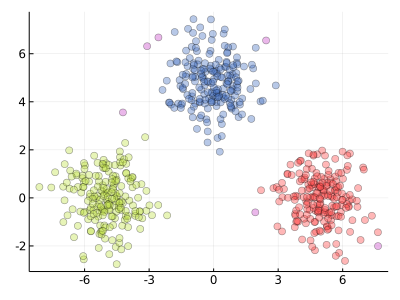

In [89]:
scatter(X[1,:],X[2,:], marker_z=a3,color=:lightrainbow,alpha=0.4, legend=false)

In [93]:
minimum(a3)

0

In [90]:
size(a3)

(600,)

In [91]:
size(X[1,:])

(600,)

In [92]:
a3

600-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3